In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize']=(13, 7)  # tamaño por defecto para los plots

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from colorama import Fore

from xgboost import XGBRegressor

from functions import *

In [33]:
df=pd.read_csv('ProyectoFinalMensual.csv')
df

Date  Inflation_Index  Brent_Price  Gold_USD  MSCI_World  SPX_value  \
0    1990-10             7.72        36.02    379.50    58415.02     304.00   
1    1990-11             7.83        33.07    384.85    56330.60     322.22   
2    1990-12             7.65        28.27    386.20    58201.46     330.22   
3     1991-1             7.44        23.57    366.00    60491.37     343.93   
4     1991-2             7.22        19.54    362.70    65002.78     367.07   
..       ...              ...          ...       ...         ...        ...   
378   2022-4             9.19       104.58   1911.30   930885.51    4545.86   
379   2022-5             9.66       113.34   1838.70   917250.24    4155.38   
380   2022-6            10.27       122.71   1817.00   864429.84    4101.23   
381   2022-7            10.24       111.93   1753.40   950606.68    3825.33   
382   2022-8            10.26       100.45   1751.25   929278.84    4118.63   

     Interest_Rate  
0             7.46  
1             7.31  
2             6.82  
3             6.59  
4             6.30  
..             ...  
378           0.33  
379           0.83  
380           1.58  
381           2.33  
382           2.33  

[383 rows x 7 columns]

### Correlación

In [34]:
corr=df.corr(method='pearson')

In [35]:
sns.set(style='white') 

mascara=np.triu(np.ones_like(corr, dtype=bool))   # genera una mascara para tapar valores


cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores


sns.heatmap(corr,# <-argumento
            mask=mascara,
            cmap=cmap,
            vmax=1,
            center=0,
            square=True,
            linewidth=0.5,
            cbar_kws={'shrink': 0.6},
            annot=True
           );

#### Correlaciones que tenemos:
Oro y Precio brent

Oro y SPX_value

Oro y MSCI World

SPX_value y MSCI World

En primera instancia el oro es el valor que se correlaciona con los demás

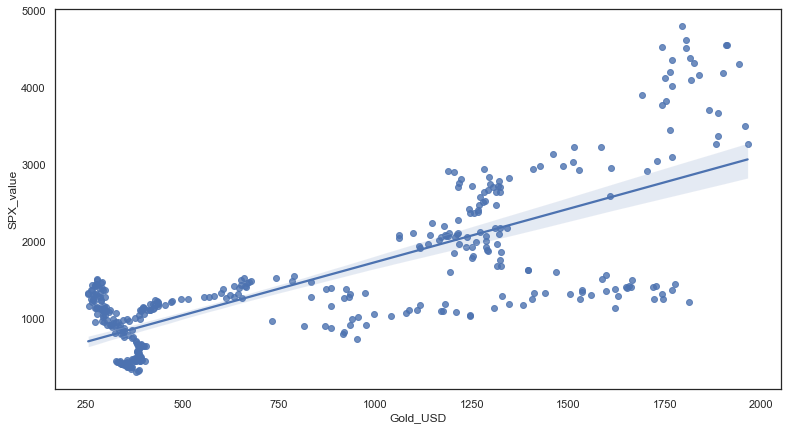

In [36]:
sns.regplot(data=df,
           x='Gold_USD',
           y='SPX_value');

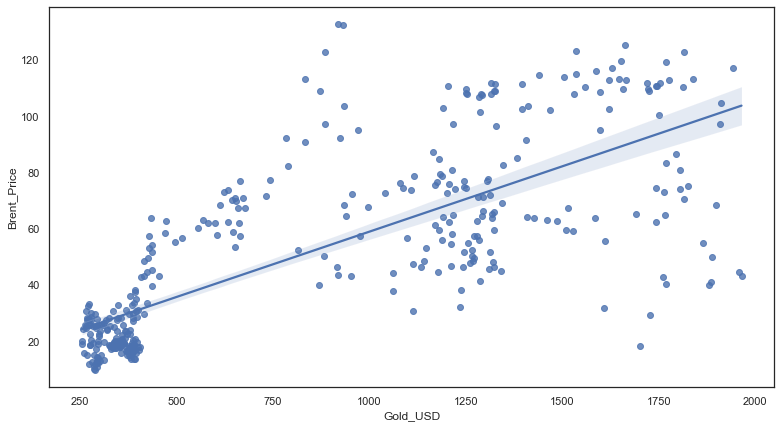

In [37]:
sns.regplot(data=df,
           x='Gold_USD',
           y='Brent_Price');

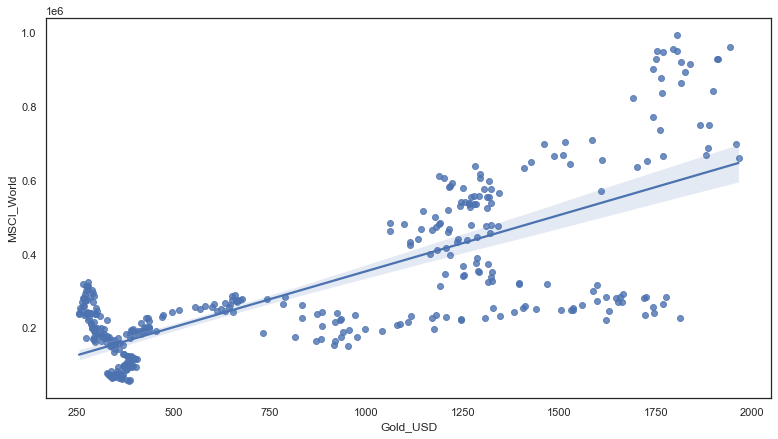

In [38]:
sns.regplot(data=df,
           x='Gold_USD',
           y='MSCI_World');

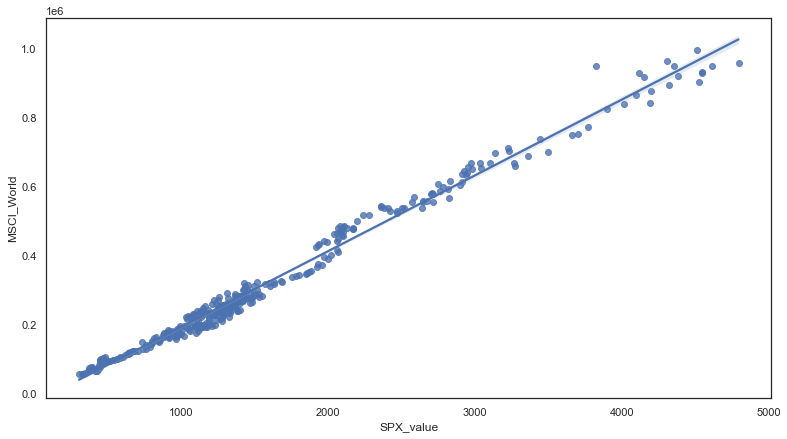

In [39]:
sns.regplot(data=df,
           x='SPX_value',
           y='MSCI_World');

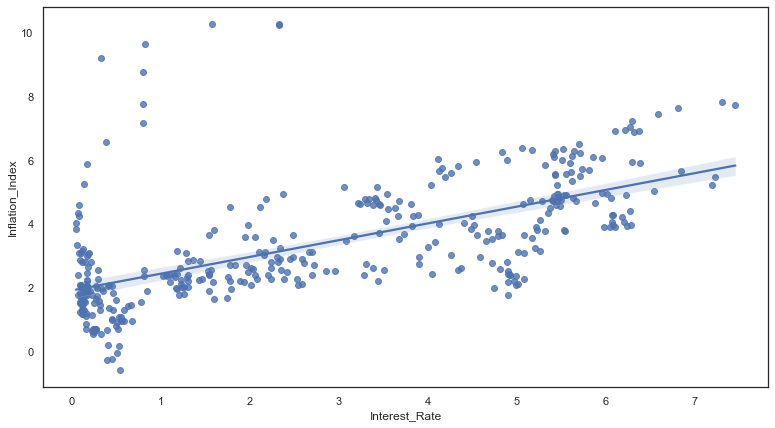

In [40]:
sns.regplot(data=df,
           x='Interest_Rate',
           y='Inflation_Index');

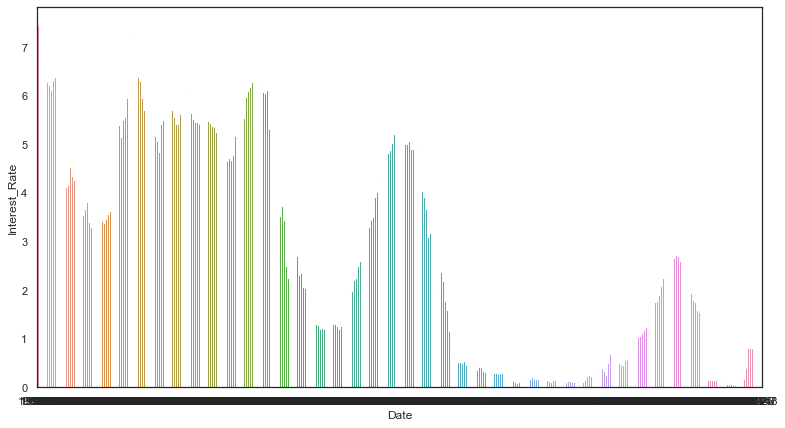

In [41]:
sns.barplot(data=df,
           x='Date',
           y='Interest_Rate');

In [42]:
sns.barplot(data=df,
           x='Date',
           y='Inflation_Index');

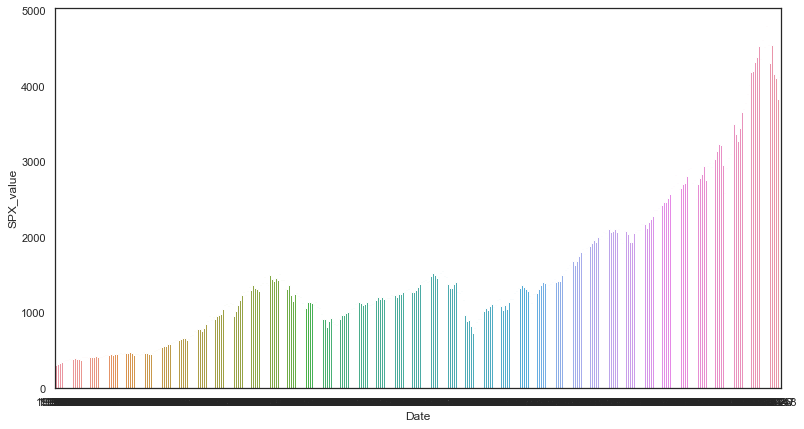

In [43]:
sns.barplot(data=df,
           x='Date',
           y='SPX_value');

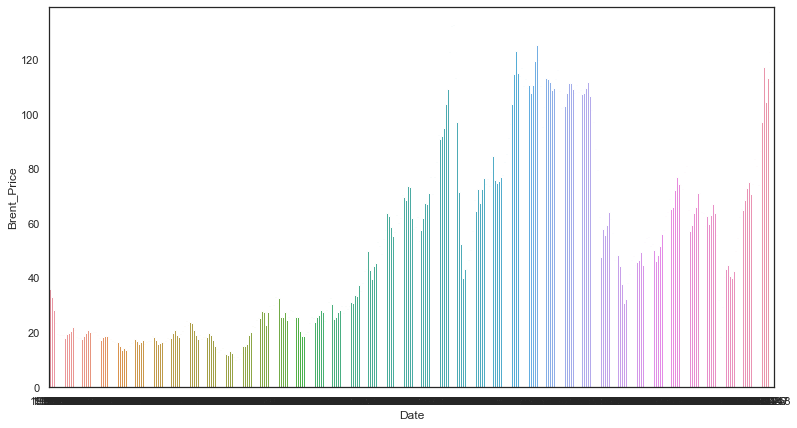

In [44]:
sns.barplot(data=df,
           x='Date',
           y='Brent_Price');

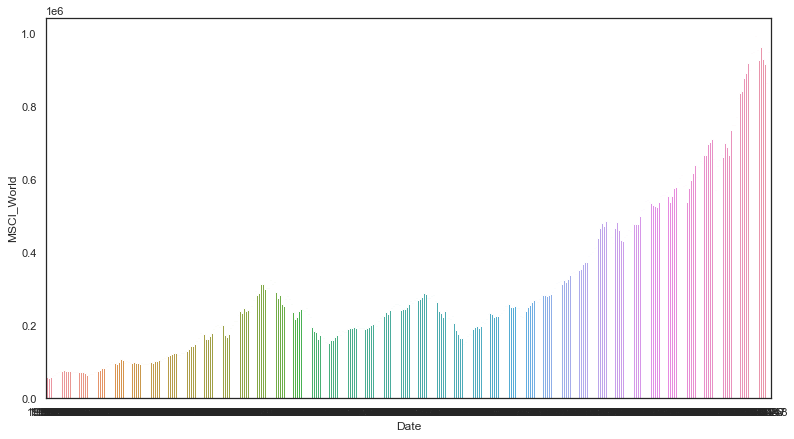

In [45]:
sns.barplot(data=df,
           x='Date',
           y='MSCI_World');

### Maching Learning

In [46]:
from functions import *

In [47]:
df = pd.read_csv('ProyectoFinalMensual.csv')

In [48]:
df.tail()

Date  Inflation_Index  Brent_Price  Gold_USD  MSCI_World  SPX_value  \
378  2022-4             9.19       104.58   1911.30   930885.51    4545.86   
379  2022-5             9.66       113.34   1838.70   917250.24    4155.38   
380  2022-6            10.27       122.71   1817.00   864429.84    4101.23   
381  2022-7            10.24       111.93   1753.40   950606.68    3825.33   
382  2022-8            10.26       100.45   1751.25   929278.84    4118.63   

     Interest_Rate  
378           0.33  
379           0.83  
380           1.58  
381           2.33  
382           2.33

In [49]:
def plot_(currency):
    fig = plt.figure(figsize=(12,6))
    g = sns.lineplot(x='Date', y=f'{currency}', data=df)
    g.set_title(f"Value of  {currency}")
    g.set_xlabel("All time")
    g.set_ylabel(f'{currency}')
    plt.show()

In [50]:
values = ['Gold_USD', 'SPX_value']

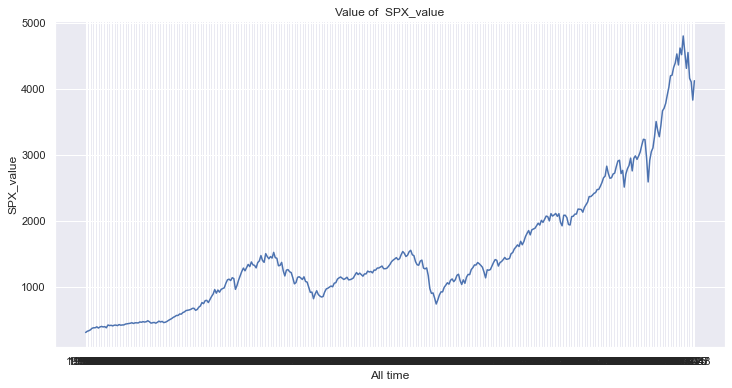

In [51]:
for i in values:
    plot_(i)

In [52]:
cdf = df[['Gold_USD', 'SPX_value']]
cdf.head()

Gold_USD  SPX_value
0    379.50     304.00
1    384.85     322.22
2    386.20     330.22
3    366.00     343.93
4    362.70     367.07

In [53]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [54]:
'''from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Inflation_Index']]) #Polinomial
train_y = np.asanyarray(train[['Interest_Rate']])

test_x = np.asanyarray(test[['Inflation_Index']])
test_y = np.asanyarray(test[['Interest_Rate']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly'''

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Gold_USD']])
train_y = np.asanyarray(train[['SPX_value']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1.44889269]]
Intercept:  [323.4118856]


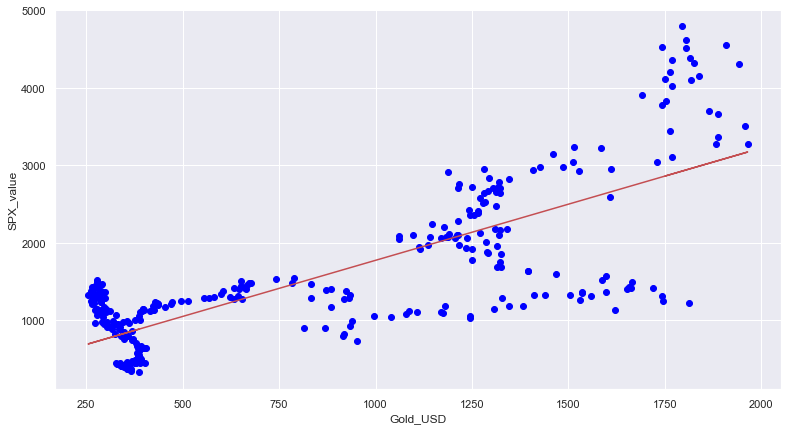

In [55]:
plt.scatter(train['Gold_USD'], train.SPX_value,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Gold_USD")
plt.ylabel("SPX_value");

In [56]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Gold_USD']])
test_y = np.asanyarray(test[['SPX_value']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 524.37
Residual sum of squares (MSE): 461340.48
R2-score: 0.33


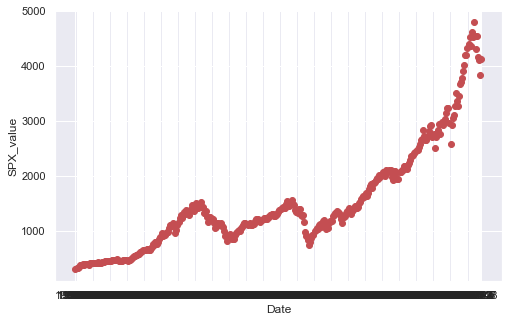

In [57]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Date"].values, df["SPX_value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('SPX_value')
plt.xlabel('Date')
plt.show()

### Visualización

Text(0.5, 1.0, 'Interest_Rate')

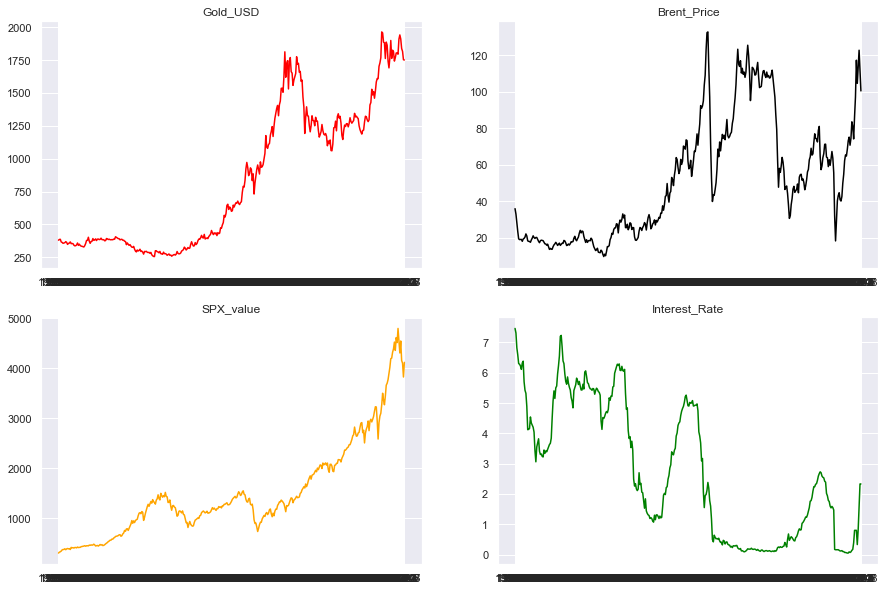

In [58]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(df['Date'], df['Gold_USD'], color="red")
plt.title('Gold_USD')

plt.subplot(2, 2, 2)
plt.plot(df['Date'], df['Brent_Price'], color="black")
plt.title('Brent_Price')

plt.subplot(2, 2, 3)
plt.plot(df['Date'], df['SPX_value'], color="orange")
plt.title('SPX_value')

plt.subplot(2, 2, 4)
plt.plot(df['Date'], df['Interest_Rate'], color="green")
plt.title('Interest_Rate')

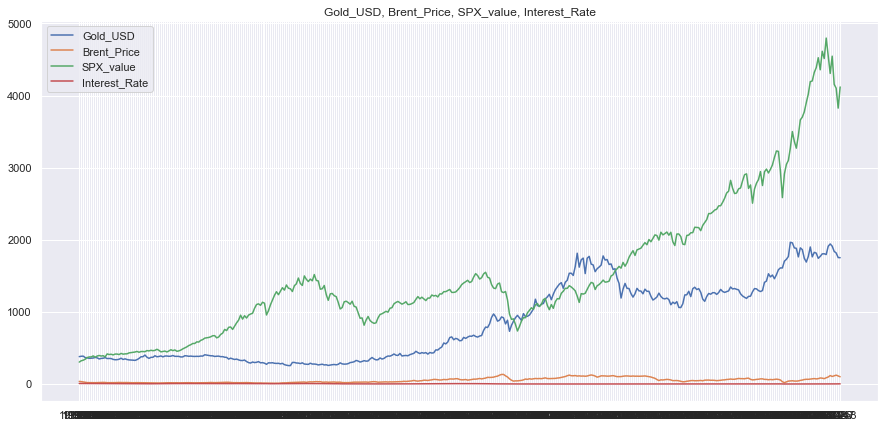

In [59]:
fig = plt.figure(figsize = (15,7))

plt.plot(df['Date'] , df['Gold_USD'])
plt.plot(df['Date'] , df['Brent_Price'])
plt.plot(df['Date'], df['SPX_value'])
plt.plot(df['Date'], df['Interest_Rate'])
plt.title('Gold_USD, Brent_Price, SPX_value, Interest_Rate')
plt.legend(['Gold_USD', 'Brent_Price', 'SPX_value', 'Interest_Rate'])


plt.show()

### Normalizando para Predicción

In [60]:
closedf = df[['Date','Brent_Price']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (383, 2)


In [61]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(383, 1)


In [62]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (268, 1)
test_data:  (115, 1)


In [63]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = df['Date'][:255], y = df['Brent_Price'][:255], color = 'black')
sns.lineplot(x = df['Date'][255:], y = df['Brent_Price'][255:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 1, fontdict=dict(weight='bold'))
ax.set_ylabel('Brent_Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

In [64]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [65]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (252, 15)
y_train:  (252,)
X_test:  (99, 15)
y_test (99,)


In [66]:
my_model = XGBRegressor(n_estimators=60)
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=60, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [67]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.052962693842631664
Root Mean squared Error - RMSE : 0.0750869691007712


In [68]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (252, 1)
Test data prediction: (99, 1)


In [69]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [70]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': df['Date'],
                       'original_close': df['Brent_Price'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (383, 1)
Test predicted data:  (383, 1)


### Decomposicion temporal Intereses

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

cierre_descompose = df[["Date", "Interest_Rate"]]

#preparamos el dataframe. Convertimos la columna temporal en index.
cierre_descompose.set_index("Date", inplace=True)

In [72]:
result = seasonal_decompose(cierre_descompose['Interest_Rate'], model='additive', period=12)

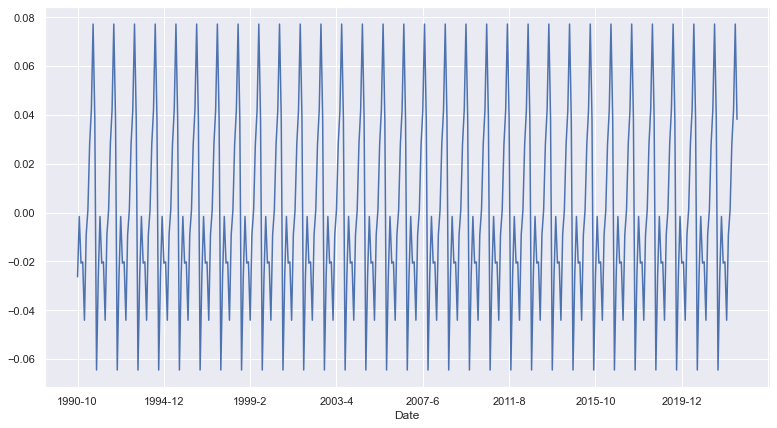

In [73]:
result.seasonal.plot();

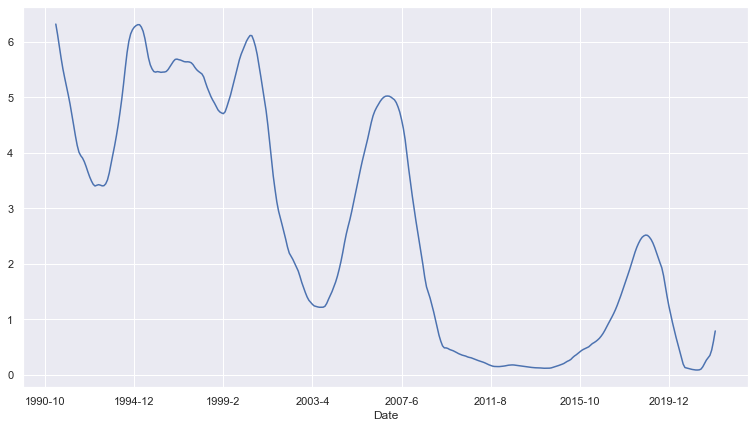

In [74]:
result.trend.plot();

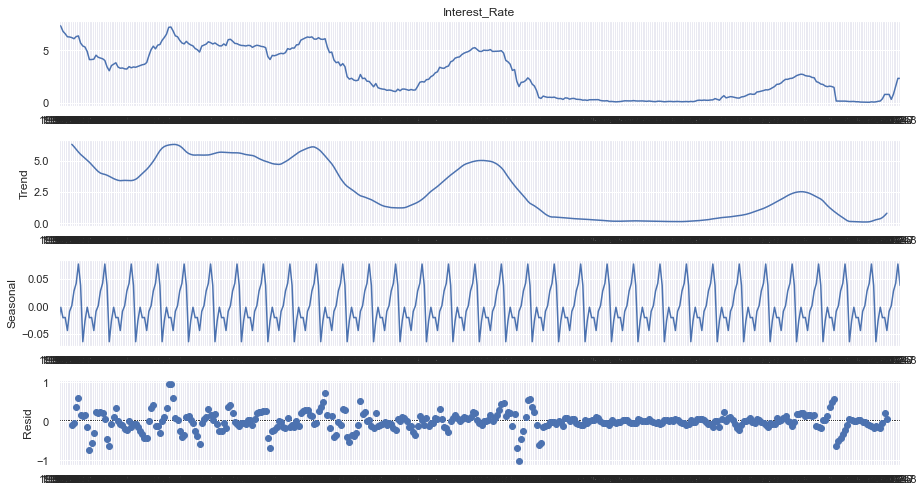

In [75]:
result.plot();

In [76]:
cierre_descompose2 = df[["Date", "Inflation_Index"]]

cierre_descompose2.set_index("Date", inplace=True)

In [77]:
result2 = seasonal_decompose(cierre_descompose2['Inflation_Index'], model='additive', period=12)

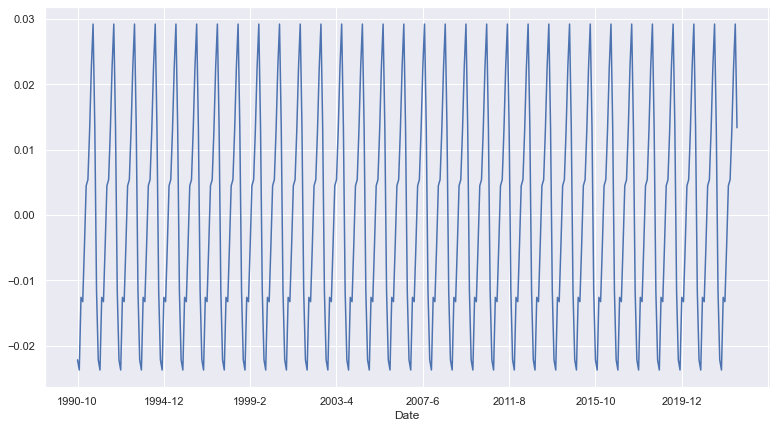

In [78]:
result2.seasonal.plot();

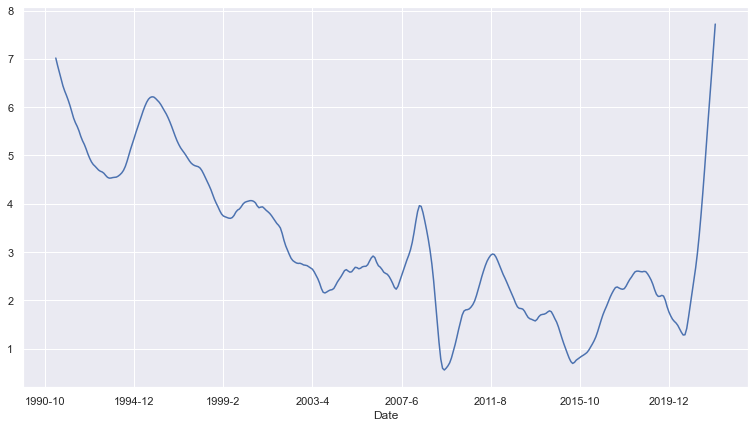

In [79]:
result2.trend.plot();

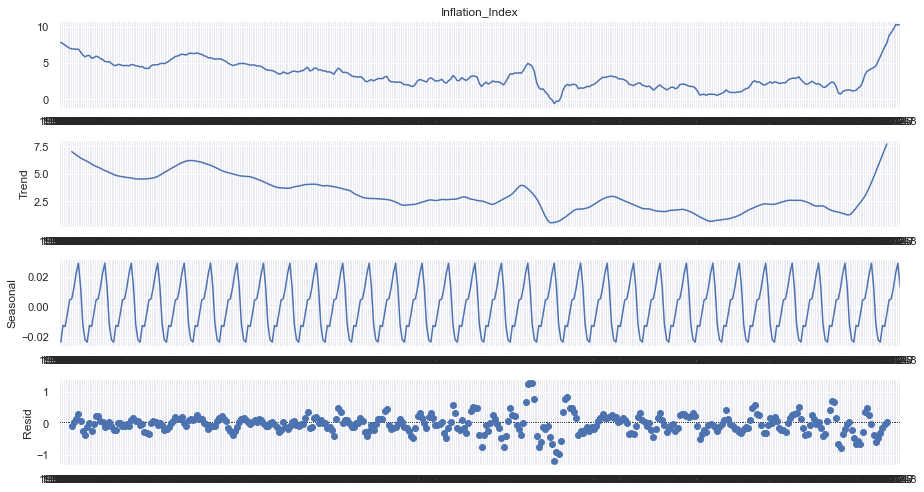

In [80]:
result2.plot();

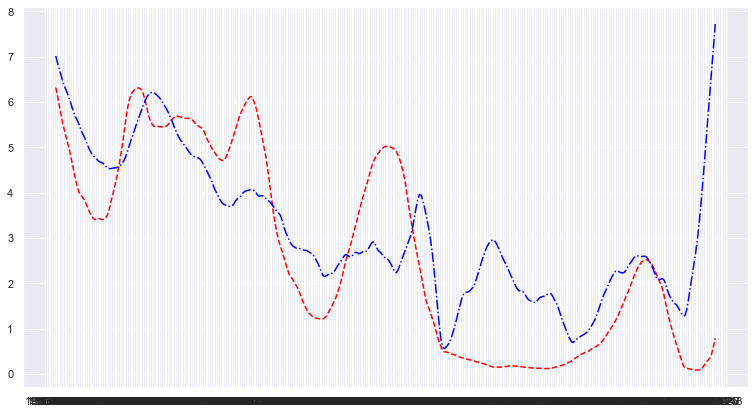

In [81]:
plt.plot(result.trend,color='red',linestyle='--')

plt.plot(result2.trend,color='blue',linestyle='-.')

plt.show()

In [82]:
result2.trend.plot();
result.trend.plot();

##### La inflación, tiene un periodo diferente pero la tendencia es similar.

### Retroceso de Fibonacci


In [129]:
spx=pd.read_csv(r'C:\Users\diego\Documents\Proyecto Final\CSV\SPX.csv')
spx=spx.sort_values(by='Date', ascending=True)
spx

Close        Date
1258  2659.99  2017-12-11
1257  2664.11  2017-12-12
1256  2662.85  2017-12-13
1255  2652.01  2017-12-14
1254  2675.81  2017-12-15
...       ...         ...
4     3998.84  2022-12-05
3     3941.26  2022-12-06
2     3933.92  2022-12-07
1     3963.51  2022-12-08
0     3934.38  2022-12-09

[1259 rows x 2 columns]

In [142]:
# Fib function

def fib_retrace(df):
  
  # Fetch data
  df=df.set_index(df['Date'])

  # Fibonacci constants
  max_value = df['Close'].max()
  min_value = df['Close'].min()
  difference = max_value - min_value

  # Set Fibonacci levels
  first_level = max_value - difference * 0.236
  second_level = max_value - difference * 0.382
  third_level = max_value - difference * 0.5
  fourth_level = max_value - difference * 0.618

  # Print levels
  print('Percentage level\t Price')
  print('0.00%\t\t', round(max_value, 3))
  print('23.6\t\t', round(first_level, 3))
  print('38.2%\t\t', round(second_level, 3))
  print('50%\t\t', round(third_level, 3))
  print('61.8%\t\t', round(fourth_level, 3))
  print('100.00%\t\t', round(min_value, 3))

  # Plot Fibonacci graph
  plot_title = 'Fibonacci Retracement for '
  fig = plt.figure(figsize=(22.5, 12.5))
  plt.title(plot_title, fontsize=30)
  ax = fig.add_subplot(111)
  plt.plot(df.index, df['Close'])
  plt.axhline(max_value, linestyle='--', alpha=0.5, color='purple')
  ax.fill_between(df.index, max_value, first_level, color='purple', alpha=0.2)

  # Fill sections
  plt.axhline(first_level, linestyle='--', alpha=0.5, color='blue')
  ax.fill_between(df.index, first_level, second_level, color='blue', alpha=0.2)

  plt.axhline(second_level, linestyle='--', alpha=0.5, color='green')
  ax.fill_between(df.index, second_level, third_level, color='green', alpha=0.2)

  plt.axhline(third_level, linestyle='--', alpha=0.5, color='red')
  ax.fill_between(df.index, third_level, fourth_level, color='red', alpha=0.2)

  plt.axhline(fourth_level, linestyle='--', alpha=0.5, color='orange')
  ax.fill_between(df.index, fourth_level, min_value, color='orange', alpha=0.2)

  plt.axhline(min_value, linestyle='--', alpha=0.5, color='yellow')
  plt.xlabel('Date', fontsize=20)
  plt.ylabel('Close Price (USD)', fontsize=20)
    
  plt.xticks(['2017-12-11', '2018-12-31', '2019-12-31', '2020-12-31','2021-12-31', '2022-12-09'], ['2018', '2019', '2020', '2021','2022', 'Actual'],rotation=20)
  


Percentage level	 Price
0.00%		 4796.56
23.6		 4192.598
38.2%		 3818.961
50%		 3516.98
61.8%		 3214.999
100.00%		 2237.4


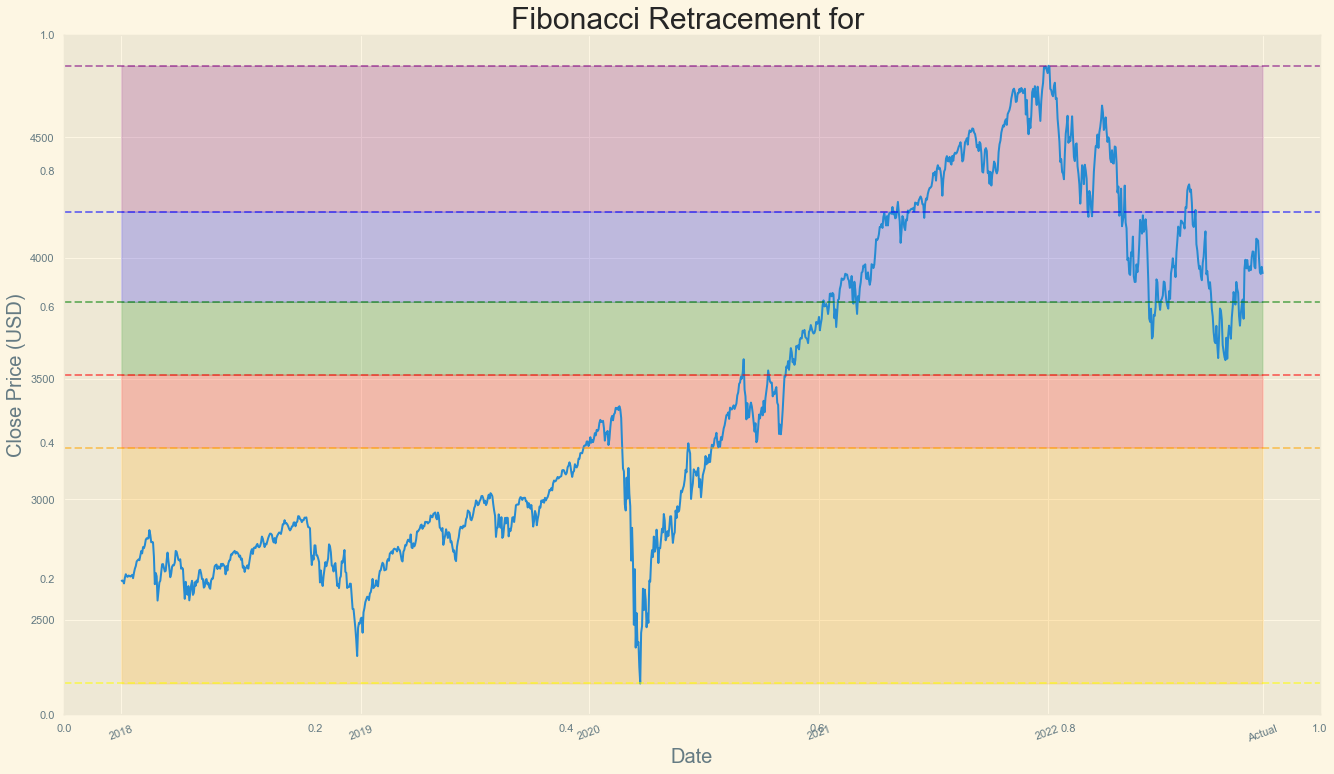

In [143]:
fib_retrace(spx)

#####

El SP 500 continúa en su escala de recuperación.
El precio superó el nivel 65% del retroceso de Fibonacci, ahora está haciendo un ‘pull back’ hacía este nivel.
Veremos si aguanta por encima de él y lo confirma o bien si se sitúa por debajo y lo vuelve a perder.

Si llegara a consolidar este nivel, por delante le quedaría la prueba definitiva de la remontada


In [150]:
gold=pd.read_csv(r'C:\Users\diego\Documents\Proyecto Final\CSV\GoldClose.csv')
gold=gold[8000:]

Percentage level	 Price
0.00%		 2067.15
23.6		 1826.961
38.2%		 1678.37
50%		 1558.275
61.8%		 1438.18
100.00%		 1049.4


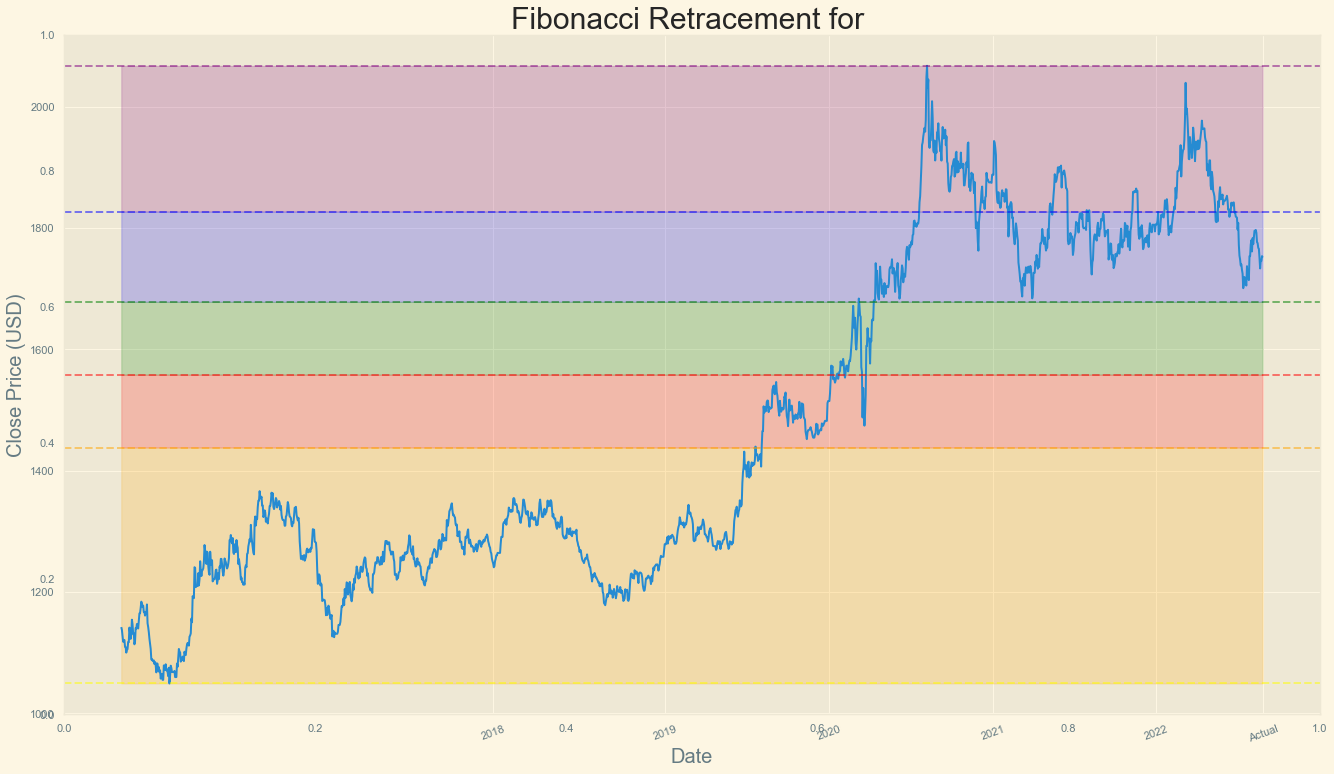

In [151]:
fib_retrace(gold)

In [161]:
brentd=pd.read_csv(r'C:\Users\diego\Documents\Proyecto Final\CSV\BrentDiario.csv')
brentd=brentd[6800:]

Percentage level	 Price
0.00%		 133.18
23.6		 103.902
38.2%		 85.789
50%		 71.15
61.8%		 56.511
100.00%		 9.12


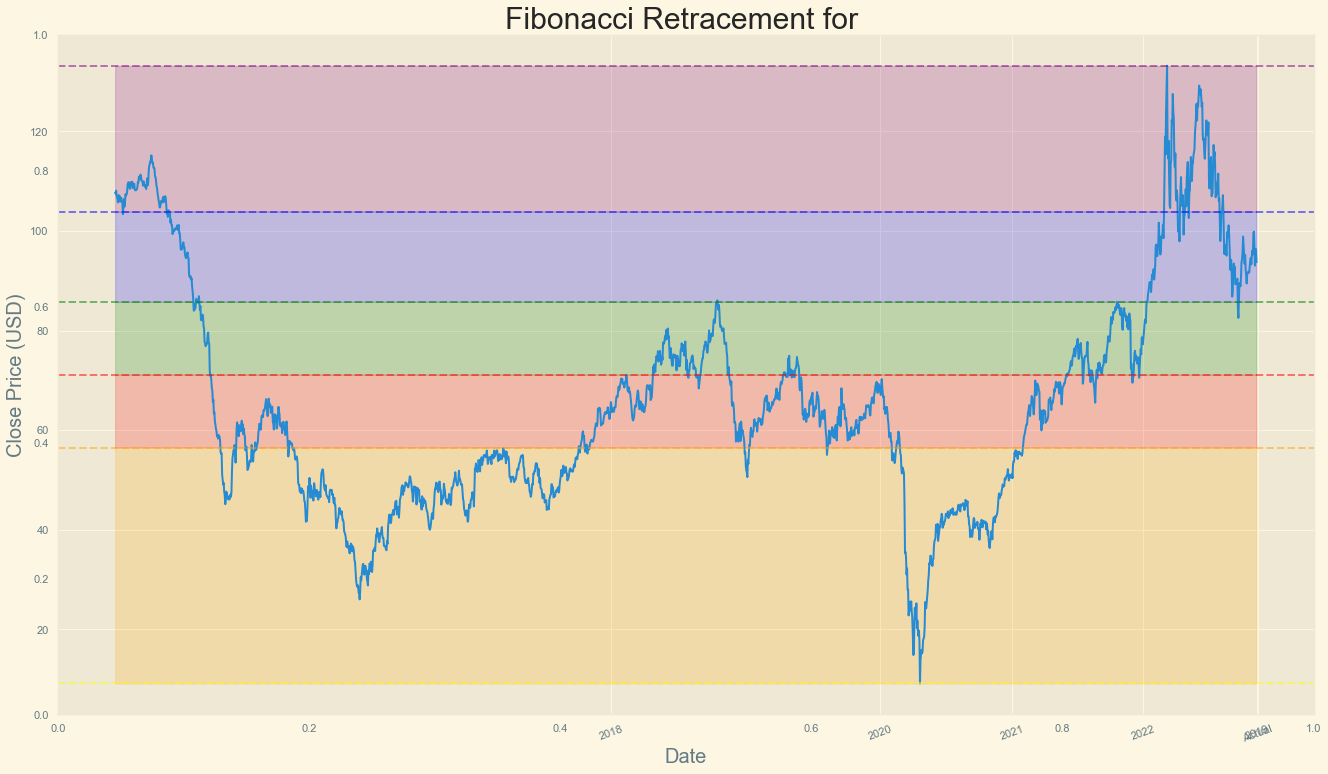

In [162]:
fib_retrace(brentd)

In [121]:
spx2=pd.read_csv(r'C:\Users\diego\Documents\Proyecto Final\Mensual-Anual Limpieza Final\SPX.csv')
spx2=spx2[23000:]
spx2

Date         Open         High          Low        Close  \
23000  2019-07-29  3024.469971  3025.610107  3014.300049  3020.969971   
23001  2019-07-30  3007.659912  3017.189941  3000.939941  3013.179932   
23002  2019-07-31  3016.219971  3017.399902  2958.080078  2980.379883   
23003  2019-08-01  2980.320068  3013.590088  2945.229980  2953.560059   
23004  2019-08-02  2943.899902  2945.500000  2914.110107  2932.050049   
...           ...          ...          ...          ...          ...   
23318  2020-10-29  3277.169922  3341.050049  3259.820068  3310.110107   
23319  2020-10-30  3293.590088  3304.929932  3233.939941  3269.959961   
23320  2020-11-02  3296.199951  3330.139893  3279.739990  3310.239990   
23321  2020-11-03  3336.250000  3389.489990  3336.250000  3369.159912   
23322  2020-11-04  3406.459961  3486.250000  3405.169922  3443.439941   

         Adj Close      Volume  
23000  3020.969971  3203710000  
23001  3013.179932  3634330000  
23002  2980.379883  4623430000  
23003  2953.560059  4762300000  
23004  2932.050049  3874660000  
...            ...         ...  
23318  3310.110107  4903070000  
23319  3269.959961  4840450000  
23320  3310.239990  4310590000  
23321  3369.159912  4220070000  
23322  3443.439941  4783040000  

[323 rows x 7 columns]

In [125]:
def plot_candlestick(prices, figsize = (13, 10), ax = None):
    """
    Plots the candlestick of a pricing data.
    Credits: https://www.statology.org/matplotlib-python-candlestick-chart/ 
    """
    
    if ax == None:
        ax = plt.figure(figsize = figsize)

    #define width of candlestick elements
    width = .4
    width2 = .05

    #define up and down prices
    up = prices[prices.Close>=prices.Open]
    down = prices[prices.Close<prices.Open]

    #plot up prices
    plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color='green')
    plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color='green')
    plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color='green')

    #plot down prices
    plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color='red')
    plt.bar(down.index,down.High-down.Open,width2,bottom=down.Open,color='red')
    plt.bar(down.index,down.Low-down.Close,width2,bottom=down.Close,color='red')

    plt.xlim([prices.index.min(), prices.index.max()])
    
    return plt.gcf()

In [126]:

def plot_fibonacci_retracement(df):
    """
    Plots the Fibonacci retracement of a pricing data.
    :param df: The pricing data.
    :return: The plot.
    """
    highest_swing = df['High'].idxmax()
    lowest_swing = df['Low'].idxmin()

    ratios = [0, 0.236, 0.382, 0.5 , 0.618, 0.786, 1]
    colors = ["black","r","g","b","cyan","magenta","yellow"]
    levels = []
    max_level = df['High'][highest_swing]
    min_level = df['Low'][lowest_swing]

    for ratio in ratios:
        if highest_swing > lowest_swing:
            levels.append(max_level - (max_level-min_level)*ratio)
        else:
            levels.append(min_level + (max_level-min_level)*ratio)

    for i in range(len(levels)):
        plt.hlines(levels[i], df.index[0], df.index[-1], label="{:.1f}%".format(ratios[i]*100),colors=colors[i], linestyles="dashed")

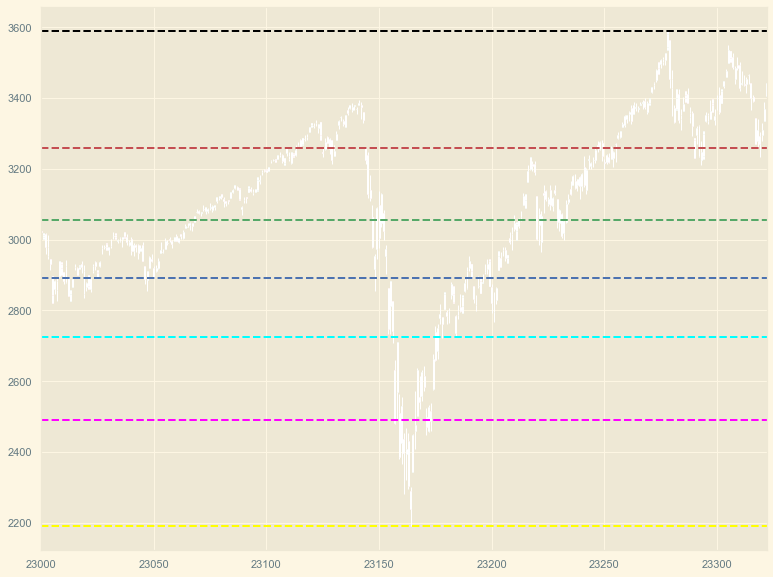

In [127]:
plot_candlestick(spx2)
plot_fibonacci_retracement(spx2)

#####

Al igual que con todos los indicadores técnicos, esta información no debe seguirse a ciegas, pero puede ofrecer una idea de la posible "pseudoaleatoriedad" de la trayectoria del precio, en particular para los activos cíclicos.

La tendencia de valores de centra entre los 2700 y los 3000.
Podemos decir que los valores a futuro pueden establecerse entre los 2800 y los 3200.
Y como vimos, esta predicción se dió.